# Project: Predict Test Scores of students

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Models</a></li>
    <ul>
    <li><a href="#inearregression">Linear Regression Model</a></li>
    <li><a href="#ann">Artificial Neural Networks Model</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we'll be analyzing and predicting data associated with students score from the Kaggle database.<br>In particular we'll be interested in generating a model capable to predict student scores based on the features provided in the database.<br>We will be trying out different model approaches such as linear regression and artificial neural networks and comparing the results each one had as much as their complexity and computational cost.

To start, we'll import the packages we need for this analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
import shap
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Fist of all, let's take a quick look on these dataset general properties.

In [2]:
df = pd.read_csv('test_scores.csv')

In [3]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
df.shape

(2133, 11)

We can see that the database contains **2133** students records and it will not have an elevated computational cost.

In [5]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


We can observe that all the numeric data is well comport. All values are inside corresponding expected ranges (no grand outliers).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
school             2133 non-null object
school_setting     2133 non-null object
school_type        2133 non-null object
classroom          2133 non-null object
teaching_method    2133 non-null object
n_student          2133 non-null float64
student_id         2133 non-null object
gender             2133 non-null object
lunch              2133 non-null object
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [7]:
df.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

In [8]:
for c in df.columns:
    if df[c].dtypes == 'object' and c != 'student_id':
        print(c)
        display(df[c].unique())

school


array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

school_setting


array(['Urban', 'Suburban', 'Rural'], dtype=object)

school_type


array(['Non-public', 'Public'], dtype=object)

classroom


array(['6OL', 'ZNS', '2B1', 'EPS', 'IQN', 'PGK', 'UHU', 'UWK', 'A33',
       'EID', 'HUJ', 'PC6', '1Q1', 'BFY', 'OMI', 'X6Z', '2AP', 'PW5',
       'ROP', 'ST7', 'XXJ', '197', '5LQ', 'JGD', 'HCB', 'NOR', 'X78',
       'YUC', 'ZDT', 'ENO', 'TSA', 'VA6', '18K', 'CXC', 'HKF', 'PBA',
       'U6J', 'W8A', '05H', '98D', 'G2L', 'P2A', 'XZM', '1VD', '21Q',
       '2BR', '3D0', '5JK', 'O6A', 'QTU', 'AJ1', 'J8J', 'RA5', '5SZ',
       '6U9', 'FS3', 'XJ8', '0N7', '3XJ', 'RK7', 'SUR', 'X2O', 'XZ4',
       '1SZ', '62L', 'NWZ', 'S98', '08N', '9AW', 'IPU', 'KXB', 'PGH',
       'XXE', '6C1', 'AE1', 'H7S', 'P8I', 'SSP', 'CD8', 'J6X', 'KR1',
       '341', 'D33', 'DFQ', 'GYM', 'IEM', '7BL', 'A93', 'TB5', 'YTB',
       '1UU', '4NN', 'V77', 'CII', 'Q0E', 'QA2', 'ZBH'], dtype=object)

teaching_method


array(['Standard', 'Experimental'], dtype=object)

gender


array(['Female', 'Male'], dtype=object)

lunch


array(['Does not qualify', 'Qualifies for reduced/free lunch'],
      dtype=object)

In [9]:
display(df.shape[0])
display(len(df['student_id'].unique()))

2133

2133

All student IDs are unique and the data doesn't have any repeated student.

### Features and Target

For the purpose of this project, we will be calling our column as follows:
- posttest -> target
- all others -> features

### Data Cleaning

As we can observe from the informations above, there is no null values for any of the database columns, all the numeric ones are represented as float type and the string columns don't appear to have any typing/input error. Also, there isn't any repeated student in the dataset so we don't have to worry about removing duplicates. Thus, there will be no need for any data cleaning.

<a id='eda'></a>
## Exploratory Data Analysis

In this section we'll be exploring the associations with several of this dataset properties and try to see if any relationship stands out.

To improve our analysis, we decided to encode our string features into numeric using the preprocessing lib from sklearn as follows:

In [10]:
df_enc = df.copy()
le = preprocessing.LabelEncoder()
for c in df_enc.columns:
    if df_enc[c].dtypes == 'object' and c != 'student_id':
        df_enc[c] = le.fit_transform(df_enc[c])
display(df_enc)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,0,2,0,22,1,20.0,2FHT3,0,0,62.0,72.0
1,0,2,0,22,1,20.0,3JIVH,0,0,66.0,79.0
2,0,2,0,22,1,20.0,3XOWE,1,0,64.0,76.0
3,0,2,0,22,1,20.0,556O0,0,0,61.0,77.0
4,0,2,0,22,1,20.0,74LOE,1,0,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,22,2,1,94,1,30.0,T8LSK,0,0,39.0,55.0
2129,22,2,1,94,1,30.0,VNP26,0,1,38.0,46.0
2130,22,2,1,94,1,30.0,YDR1Z,0,1,45.0,51.0
2131,22,2,1,94,1,30.0,YUEIH,1,1,46.0,53.0


### Correlation Matrix
Now we can plot a correlation matrix between all the features:

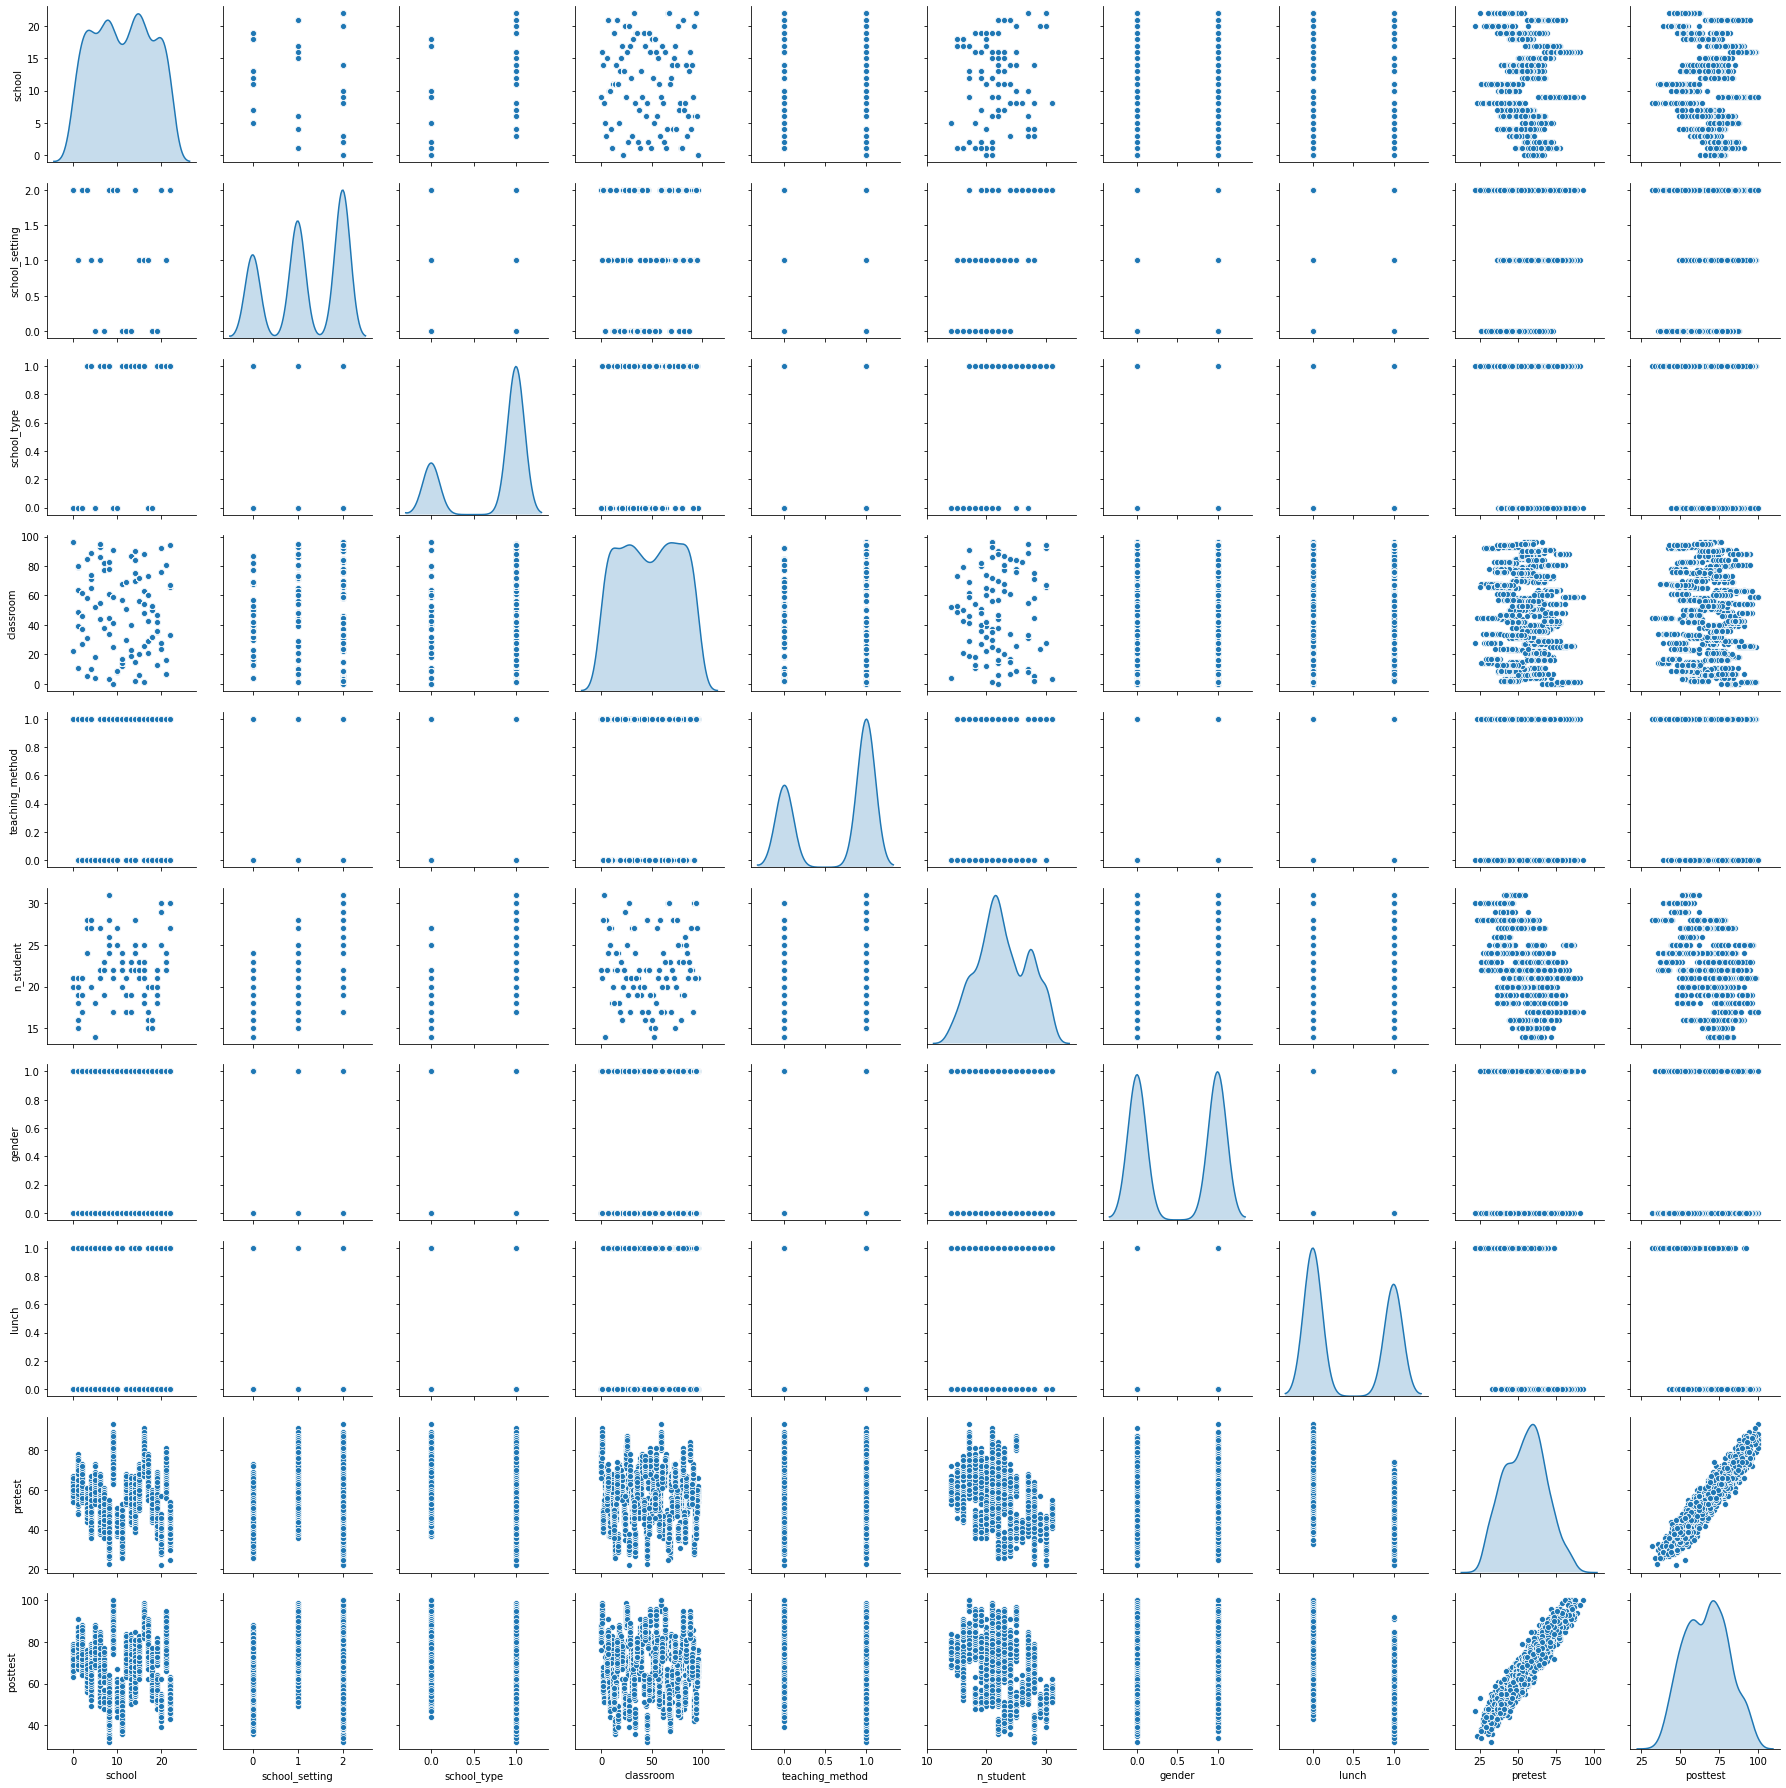

In [11]:
sns.pairplot(df_enc, diag_kind="kde");

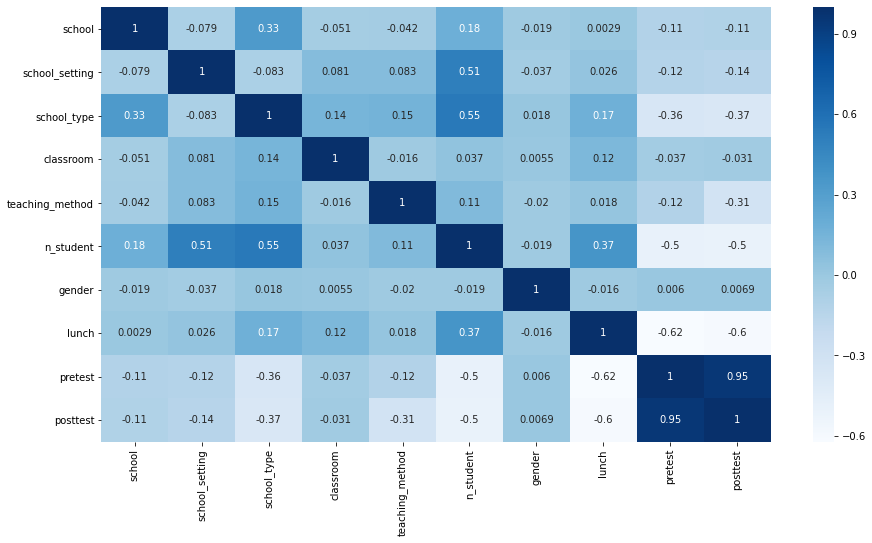

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df_enc.corr(), annot=True, cmap='Blues');

This chart helps us visualize the pairwise correlation between all the columns from the dataset. However, we are only interested in correlation values related to the target. Therefore, we will concentrate our attention to those values from the last column of the figure above.
We can already see that **pretest** alone has a high correlation value with our target **posttest** column (0.95).

In [13]:
posttest_corr = df_enc.corr()['posttest'].sort_values(ascending=True)
posttest_corr.drop(['posttest'], inplace=True)

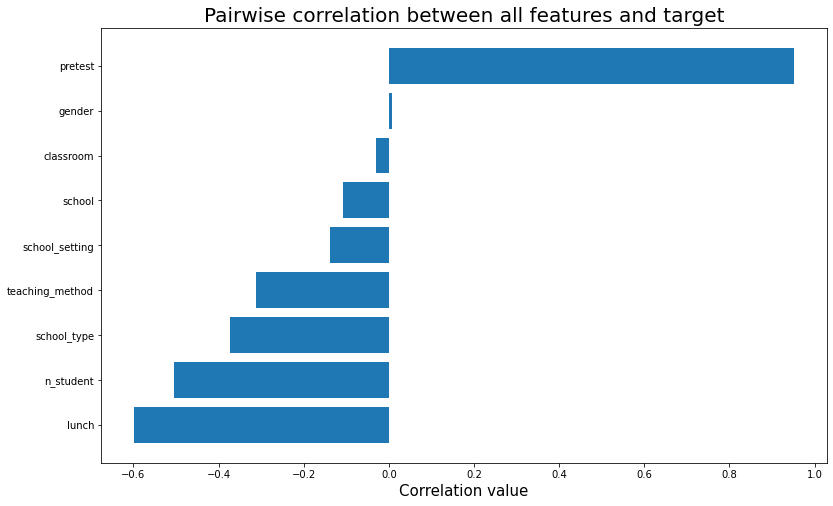

In [14]:
plt.figure(figsize=(13,8))
plt.barh(y = posttest_corr.keys(), width = list(posttest_corr))
plt.title('Pairwise correlation between all features and target', fontsize=20)
plt.xlabel('Correlation value', fontsize=15);

<a id='model'></a>
## Models

In this section we'll be testing a few prediction models and checking theirs results to compare each one and see if we can find the best solution for our problem.

### Metrics

In order to evaluate how good a model is and comparing the results of various models, we will be using metrics such as:
- **R2**
- **MSE** (mean square error)
- **MAE** (mean absolute error).

In [15]:
# Print model results
def Results(y_test, y_pred):
    print("MSE: %f | MAE: %f | R^2: %f "%(mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)))

### Normalization

In [16]:
def Normalize(df):
    df_norm = df.copy()
    cols = df.drop(columns=['posttest','pretest','student_id']).columns
    for col in cols:
        m = df_enc[col].max()
        df_norm[col] = df_norm[col]/m
        df_norm[col] = df_norm[col]*2
        df_norm[col] = df_norm[col]-1

    df_norm['pretest'] = df_norm['pretest']/100*2-1
    df_norm['posttest'] = df_norm['posttest']/100*2-1

    return df_norm

### Training and Testing Data
We will be dividing our samples into training and testing data using a **20%** threshold to select the testing set as follows:

In [17]:
df_norm = Normalize(df_enc)
df_norm = df_norm.sample(frac=1)
df_x = df_norm.drop(columns=['posttest','student_id'])
df_y = df_norm[['posttest']]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

<a id='inearregression'></a>
### Linear Regression Model

The best solution is the one which solves the problem (get accepted results) the simpler way possible. With that in mind, we will approach this prblem using first a linear regression.

#### Estimating feature importance by random forest algorithm

We now generate a random forest model just to obtain the importance of all features to contrast with the pairwise correlation and see which features we are going to use in our linear regression model.

We will not be trying out the random forest algorithm as a candidate solution for this problem fo the reasons listed below.<br>
Disavantages of random forest usage for regression problem:
<ol>
  <li>Works better for classification problems</li>
  <li>Does not give precise continuous nature predictions</li>
  <li>Does not predict beyond the range of the training data</li>
  <li>May overfit datasets that are partucularly noisy</li>
</ol>

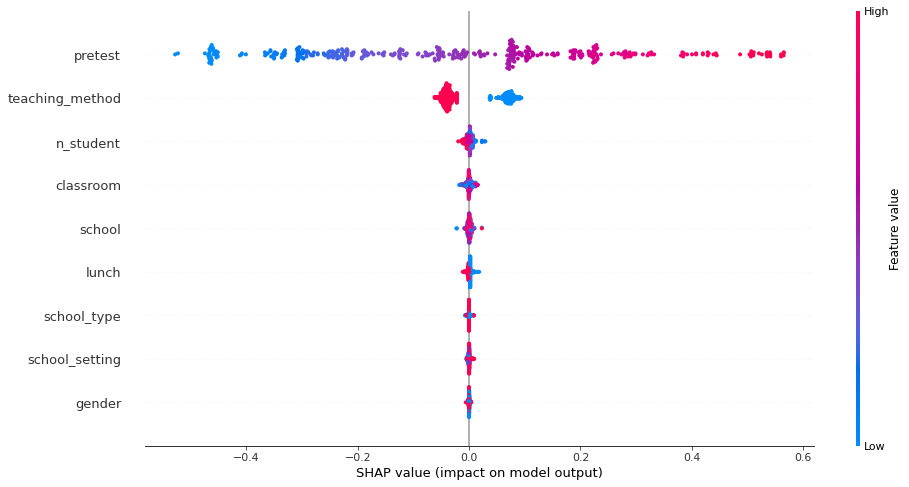

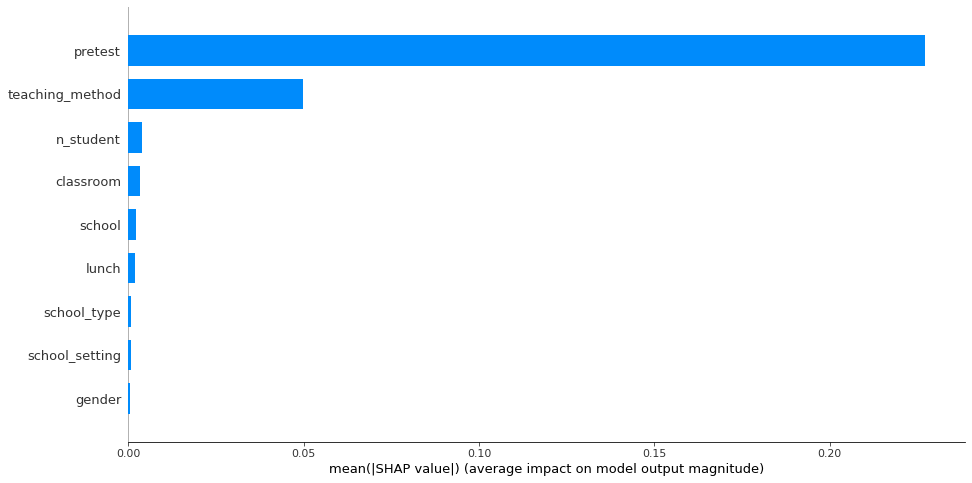

In [18]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10).fit(x_train, y_train)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_size=(15,8))
shap.summary_plot(shap_values, x_test, plot_type="bar", plot_size=(15,8))

As we can see, we have the **pretest** feature with the most importance followed by **teaching_method**, which is a little different from our pairwise correlation conclusion from before. However, as discussed earlier, the pairwise correlation is only capable to give us the relation between each one of the features with the target separately. And what this feature importance chart from the random forest algorithm tells us is that the pretest and teaching_method **together** have a higher impact when using in a linear regression model as opose to use the pretest with, for exemple, our second most pairwise correlated feature, lunch.

#### Linear regression for all possible feature combination

Since we have a small database with a small number of features, we can generate one linear regression model for each possible feature combination and see which one give us the best metrics.

In [19]:
features = list(df_norm.drop(columns=['student_id','posttest']).columns.values)
number_of_features = len(features)

r_max = 0
features_max = []
d = {}
index = 0
for i in range(1,number_of_features+1):
    
    c = combinations(features,i)
    for j in c:
        col_list = list(j)
        
        reg = LinearRegression()
        reg.fit(x_train[col_list], y_train)
        y_pred = reg.predict(x_test[col_list])
        r = r2_score(y_test, y_pred)
        
        if r > r_max:
            r_max = r
            features_max = col_list.copy()
        
        d[index] = r
        
        index += 1

print('Max R2 value found: {}'.format(r_max))
print('Features used: {}'.format(', '.join(features_max)))

Max R2 value found: 0.9505415152419787
Features used: school, school_setting, school_type, classroom, teaching_method, gender, lunch, pretest


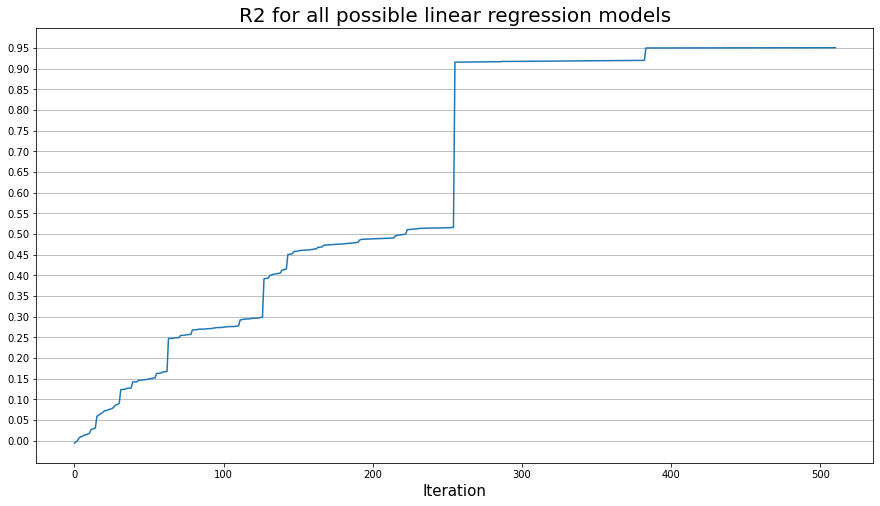

In [20]:
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
plt.figure(figsize=(15,8))
plt.plot(range(len(d.values())),d.values())
plt.title('R2 for all possible linear regression models', fontsize=20)
plt.xlabel('Iteration', fontsize=15)
plt.yticks(np.arange(0, 1, 0.05))
plt.grid(axis='y');

According to the R2 metric, the combination of features shown above give us the best possible linear regression model.

Let's try using just the pretest feature to see how it will compare to this one.

In [21]:
col_list = ['pretest']
print('Features = ' + ', '.join(col_list))

reg = LinearRegression()
reg.fit(x_train[col_list], y_train)

Results(y_test, reg.predict(x_test[col_list]))

Features = pretest
MSE: 0.006960 | MAE: 0.068150 | R^2: 0.916065 


This corroborate what we have already seen in the pairwise correlation analysis and in the random forest feature importance. The pretest feature alone is enough to give us a very good R2 result.<br>In other words, if a R2 of 0.90 is sufficient for our problem, we're done.

But since we know there's still a little gap to the best model, let's try to add both **lunch** and **teaching_method** at a time to see if we can improve our results and validade either the pairwise correlation analysis or the random forest feature importance analysis for the second most important feature.

#### pretest & lunch

In [22]:
col_list = ['pretest','lunch']
print('Features = ' + ', '.join(col_list))

reg = LinearRegression()
reg.fit(x_train[col_list], y_train)

Results(y_test, reg.predict(x_test[col_list]))

Features = pretest, lunch
MSE: 0.006958 | MAE: 0.068248 | R^2: 0.916097 


We can now corroborate our hypothesis that the pairwise correlation isn't enough information to tell us which feature to use. The lunch together with the pretest didn't improve our results of using only the second one. Hence the feature importance might show better results.

#### pretest & teaching_method

In [23]:
col_list = ['pretest','teaching_method']
print('Features = ' + ', '.join(col_list))

reg = LinearRegression()
reg.fit(x_train[col_list], y_train)

Results(y_test, reg.predict(x_test[col_list]))

Features = pretest, teaching_method
MSE: 0.004159 | MAE: 0.051964 | R^2: 0.949842 


As we can see from the results presented above, the **teaching_method** feature combined with the **pretest** were able to accomplish a very high R2 value, really close to the one known as the best but using just two features instead of six. Also, according to the random forest feature importance analysis, lunch wouldn't actully improve our results as we just saw.

<a id='ann'></a>
### Artificial Neural Networks Model

For the purpose of choosing better parameters, we will let the RandomizedSearchCV (for simplicity) lib worry about telling us which one to choose to define our artificial neural networks model.

In [24]:
def search_param(model,distributions,x,y):
    m = RandomizedSearchCV(model, distributions, random_state=0)
    search = m.fit(x, y)
    return search.best_params_

In [25]:
parameter_space = {
    'hidden_layer_sizes': [(2,1),(10,5,1),(10,1),(50,50,1), (50,100,1), (100,1)],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'activation':['identity','relu'],
    'learning_rate_init': [0.001,0.005,0.0001,0.001],
    'max_iter':[100,200,300,400,500,600],
    'shuffle':[True,False]
}
mlp = MLPRegressor()
best_params = search_param(mlp,parameter_space,x_train, y_train)
print(best_params)

{'solver': 'adam', 'shuffle': True, 'max_iter': 300, 'learning_rate_init': 0.005, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 1), 'alpha': 0.0001, 'activation': 'identity'}


#### all features
Using all features

In [26]:
mlp = MLPRegressor(
    solver = best_params["solver"],
    shuffle = best_params["shuffle"],
    max_iter = best_params["max_iter"],
    learning_rate_init = best_params['learning_rate_init'],
    learning_rate = best_params['learning_rate'],
    hidden_layer_sizes = best_params["hidden_layer_sizes"],
    alpha = best_params['alpha'],
    activation = best_params["activation"]
)

mlp.fit(x_train, y_train)
Results(y_test, mlp.predict(x_test))

MSE: 0.004243 | MAE: 0.052685 | R^2: 0.948834 


#### pretest
Using just the pretest feature.

In [27]:
mlp = MLPRegressor(
    solver = best_params["solver"],
    shuffle = best_params["shuffle"],
    max_iter = best_params["max_iter"],
    learning_rate_init = best_params['learning_rate_init'],
    learning_rate = best_params['learning_rate'],
    hidden_layer_sizes = best_params["hidden_layer_sizes"],
    alpha = best_params['alpha'],
    activation = best_params["activation"]
)

col_list = ['pretest']
print('Features = ' + ', '.join(col_list))

mlp.fit(x_train[col_list], y_train)
Results(y_test, mlp.predict(x_test[col_list]))

Features = pretest
MSE: 0.007779 | MAE: 0.072309 | R^2: 0.906197 


#### pretest & teaching_method
Using pretest and teaching_method features

In [28]:
mlp = MLPRegressor(
    solver = best_params["solver"],
    shuffle = best_params["shuffle"],
    max_iter = best_params["max_iter"],
    learning_rate_init = best_params['learning_rate_init'],
    learning_rate = best_params['learning_rate'],
    hidden_layer_sizes = best_params["hidden_layer_sizes"],
    alpha = best_params['alpha'],
    activation = best_params["activation"]
)

col_list = ['pretest', 'teaching_method']
print('Features = ' + ', '.join(col_list))

mlp.fit(x_train[col_list], y_train)
Results(y_test, mlp.predict(x_test[col_list]))

Features = pretest, teaching_method
MSE: 0.004155 | MAE: 0.051959 | R^2: 0.949892 


Similarly for the case of the linear regression model, we can see that our results using artificial neural networks are pretty close. And the same goes for the analysis of the impact of each feature on the R2 results.

<a id='conclusions'></a>
## Conclusions

After analysing, comparing and running different models, we can conclude that:

- Both models yield the same result regarding our metrics. However, the linear regression is easier in a lot of ways such as fewer number of parameters to be chosen from, faster to train, demand less computational effort and we can understand better what the linear regression model is doing as opposed to the neural networks which has a more abstract system;
- Depending on how good we need our metrics to be, we are looking for a prediction model capable of yielding results inside a satisfactory range. Therefore, we need to choose the simplest yet good model that satisfy our requisitions. With that in mind, one possible model would be the linear regression using two features (**pretest** and **teaching_method**). It's not worth to increase the number of parameters in order to improve a tiny bit of the R2 metric since it would also increase the model complexity and the model dimension. In others real world situations, these are limiting factors that can impact on your model quality.